# Lab 02

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## TODO 1

### Question - Describe the distribution of data in histograms for different bin sizes. Briefly explain any mechanism for calculating the optimal number of bins in a histogram

In [28]:
gapminder_df = pd.read_csv('gapminder.tsv', sep='\t') #Read the dataset
recent_year = gapminder_df['year'].max() #Get the most recent year
recent_year_df = gapminder_df[gapminder_df['year'] == recent_year] #Filter the dataframe based on the most recent year

Text(0, 0.5, 'Number of countries')

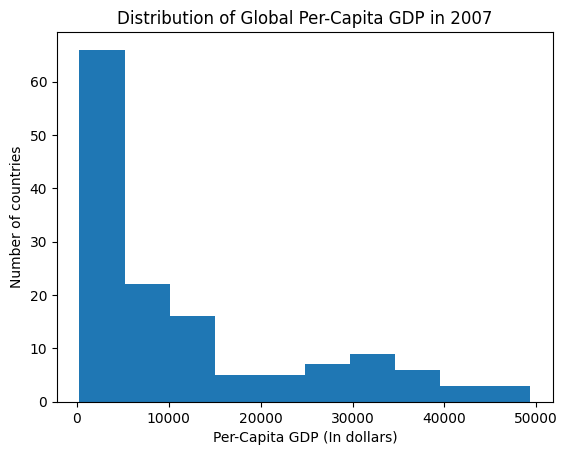

In [29]:
plt.hist(recent_year_df['gdpPercap']) #Plot the histogram
plt.title('Distribution of Global Per-Capita GDP in 2007') #Add a title to the plot
plt.xlabel('Per-Capita GDP (In dollars)') #Add labels to the axes
plt.ylabel('Number of countries') #Add labels to the axes

Text(0, 0.5, 'Number of countries')

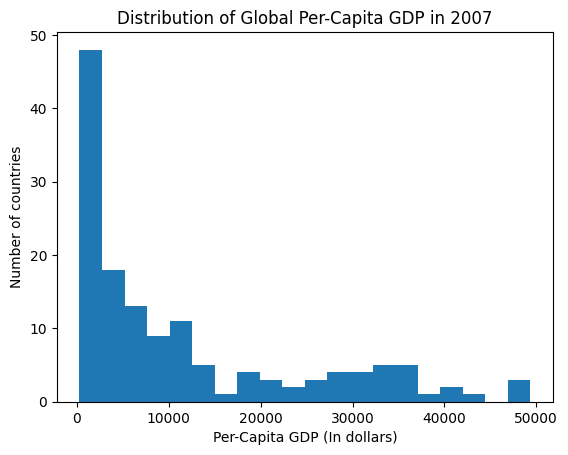

In [30]:
# Using Bin size of 20

plt.hist(recent_year_df['gdpPercap'], bins=20) #Plot the histogram
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries')

Text(0, 0.5, 'Number of countries')

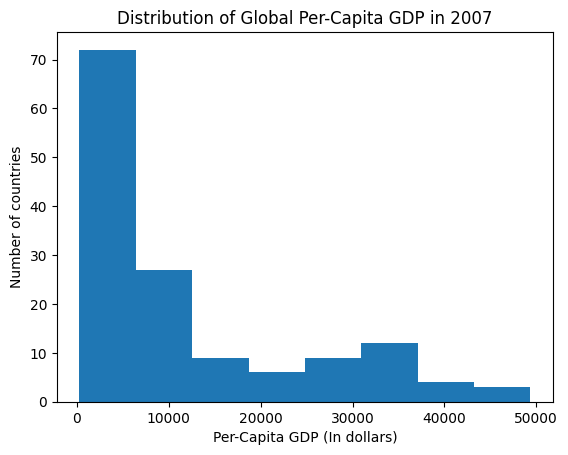

In [35]:
# Using optimal bin size by Freedman-Diaconis rule

binWidth = 2 * (np.percentile(recent_year_df['gdpPercap'], 75) - np.percentile(recent_year_df['gdpPercap'], 25)) * (len(recent_year_df['gdpPercap']) ** (-1/3))
datarng = max(recent_year_df['gdpPercap']) - min(recent_year_df['gdpPercap'])

plt.hist(recent_year_df['gdpPercap'], bins=int(datarng/binWidth + 1)) #Plot the histogram
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries')

## TODO 2

### Question - Compare how Sri Lanka’s per capita GDP has changed relative to its neighboring country India by plotting a second line plot on the same graph

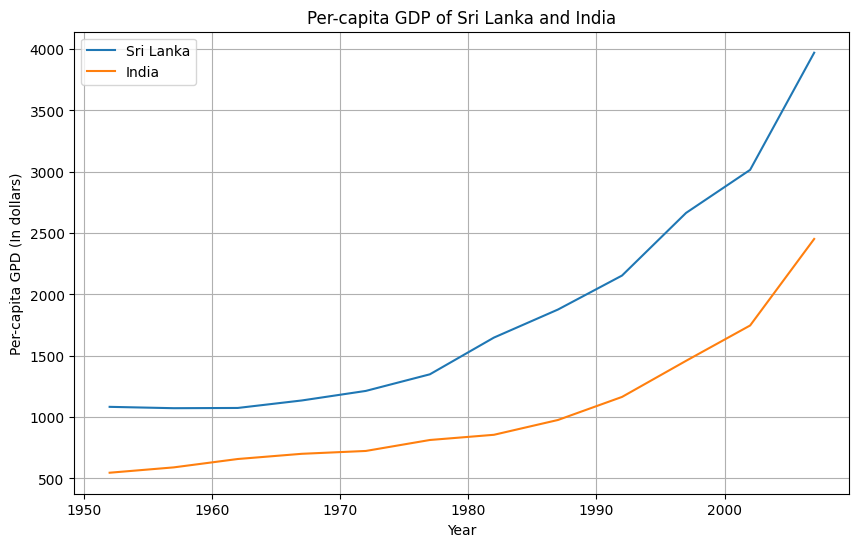

In [25]:
gapminder_df = pd.read_csv('gapminder.tsv', sep='\t') #Read the dataset
lk = gapminder_df[gapminder_df['country'] == 'Sri Lanka']
india = gapminder_df[gapminder_df['country'] == 'India']
plt.figure(figsize=(10, 6))
plt.plot(lk['year'], lk['gdpPercap'])
plt.plot(india['year'], india['gdpPercap'])
plt.legend(['Sri Lanka', 'India'])
plt.title('Per-capita GDP of Sri Lanka and India')
plt.xlabel('Year')
plt.ylabel('Per-capita GPD (In dollars)')
plt.grid()

Rate of change of the per Capita GDP has been same throughout the year, but it has always been lower in value for India compared to Sri lanka

## TODO 3

### Q1 - Load the given winequality red.csv dataset based on the Wine Quality Dataset in the UCI Machine Learning Repository.

In [3]:
winequality_red_df = pd.read_csv('winequality_red.csv', sep=',') #Read the dataset
winequality_red_df.head() #Display first few rows of the dataset
winequality_red_df['quality'].describe() #Display the summary of the quality column

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

### Q2 - Identify the independent and dependent variables of the dataset

In [4]:
# Following code is used to display the first few rows of the dataset which are the independent variables
winequality_red_df.iloc[:, :-1] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
# thus the dependent variable in this dataset is the quality of the wine
winequality_red_df.iloc[:, -1]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Q3

#### (a) - Identify any missing values (if any)

'\nThe above function is used to check for missing values in the dataset. Missing values are identified as NaN. \nThe function isnull() returns a boolean value for each cell in the dataset. \nThe sum() function is used to sum up the number of missing values in each column. \nThe plot() function is used to plot the number of missing values in each column as a bar graph. \nThe bar graph shows that there are no missing values in the dataset.\n'

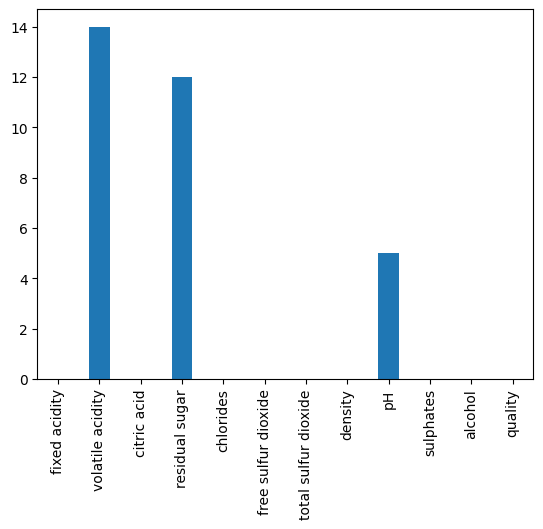

In [6]:
#check for missing values
winequality_red_df.isnull().sum().plot(kind='bar')
"""
The above function is used to check for missing values in the dataset. Missing values are identified as NaN. 
The function isnull() returns a boolean value for each cell in the dataset. 
The sum() function is used to sum up the number of missing values in each column. 
The plot() function is used to plot the number of missing values in each column as a bar graph. 
The bar graph shows that there are no missing values in the dataset.
"""

#### (b) - State three ways of handling missing values in ML

Following are three ways to handle missing values in a dataset 
1. Deletion
2. Imputation
3. Using algorithms (example:- KNN)

In [7]:
# method 1: drop rows with missing values
deletion_df = winequality_red_df.dropna() #drop rows with missing values
print(deletion_df.isnull().sum()) #check for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
# method 2: replace missing values with mean column values
mean_df = winequality_red_df.fillna(winequality_red_df.mean()) #replace missing values with mean column values
mean_df.isnull().sum() #check for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# method 2: replace missing values with median column values
median_df = winequality_red_df.fillna(winequality_red_df.median()) #replace missing values with median column values
median_df.isnull().sum() #check for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### (c) - Apply one of the most convenient methods for handling missing values (if any) in the dataset. Justify your work.

In [10]:
"""
As the most convenient and most suitable way for handling missing values in this dataset is to drop the rows with missing values,
since the number of missing values are low and the dataset is large compared to the number of missing values.
So there will not be a significant loss of data if we drop the rows with missing values
"""
# drop rows with missing values
print(winequality_red_df.isnull().sum()) #check for missing values
print("Shape:",winequality_red_df.shape) #check the shape of the dataset
# print(winequality_red_df.describe()) #check the statistical summary of the dataset
print()
deletion_df = winequality_red_df.dropna() #drop rows with missing values
print(deletion_df.isnull().sum()) #check for missing values
print("Shape:",deletion_df.shape) #check the shape of the dataset
# deletion_df['volatile acidity'].describe().plot() #check the statistical summary of the dataset

fixed acidity            0
volatile acidity        14
citric acid              0
residual sugar          12
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       5
sulphates                0
alcohol                  0
quality                  0
dtype: int64
Shape: (1599, 12)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Shape: (1568, 12)


### Q4 - Identify the three highly correlated attributes by graphically exploring the correlation between each attribute and the quality of the wine (consider the direction and magnitude of the correlation)

In [11]:
# identify the correlation between each attribute and wine quality
correlations = winequality_red_df.corr()['quality'].sort_values()
print(correlations)

volatile acidity       -0.392543
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.055133
free sulfur dioxide    -0.050656
residual sugar          0.013736
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


As seen from above results, whichever column is nearest to -1 or +1 is more correlated with "quality" of wine.
Since it's asked to select only three, following can be selected:
1. volatile acidity
2. alcohol
3. sulphates

### Q5 - Visualize the relationship between each pair of attributes using a scatter matrix

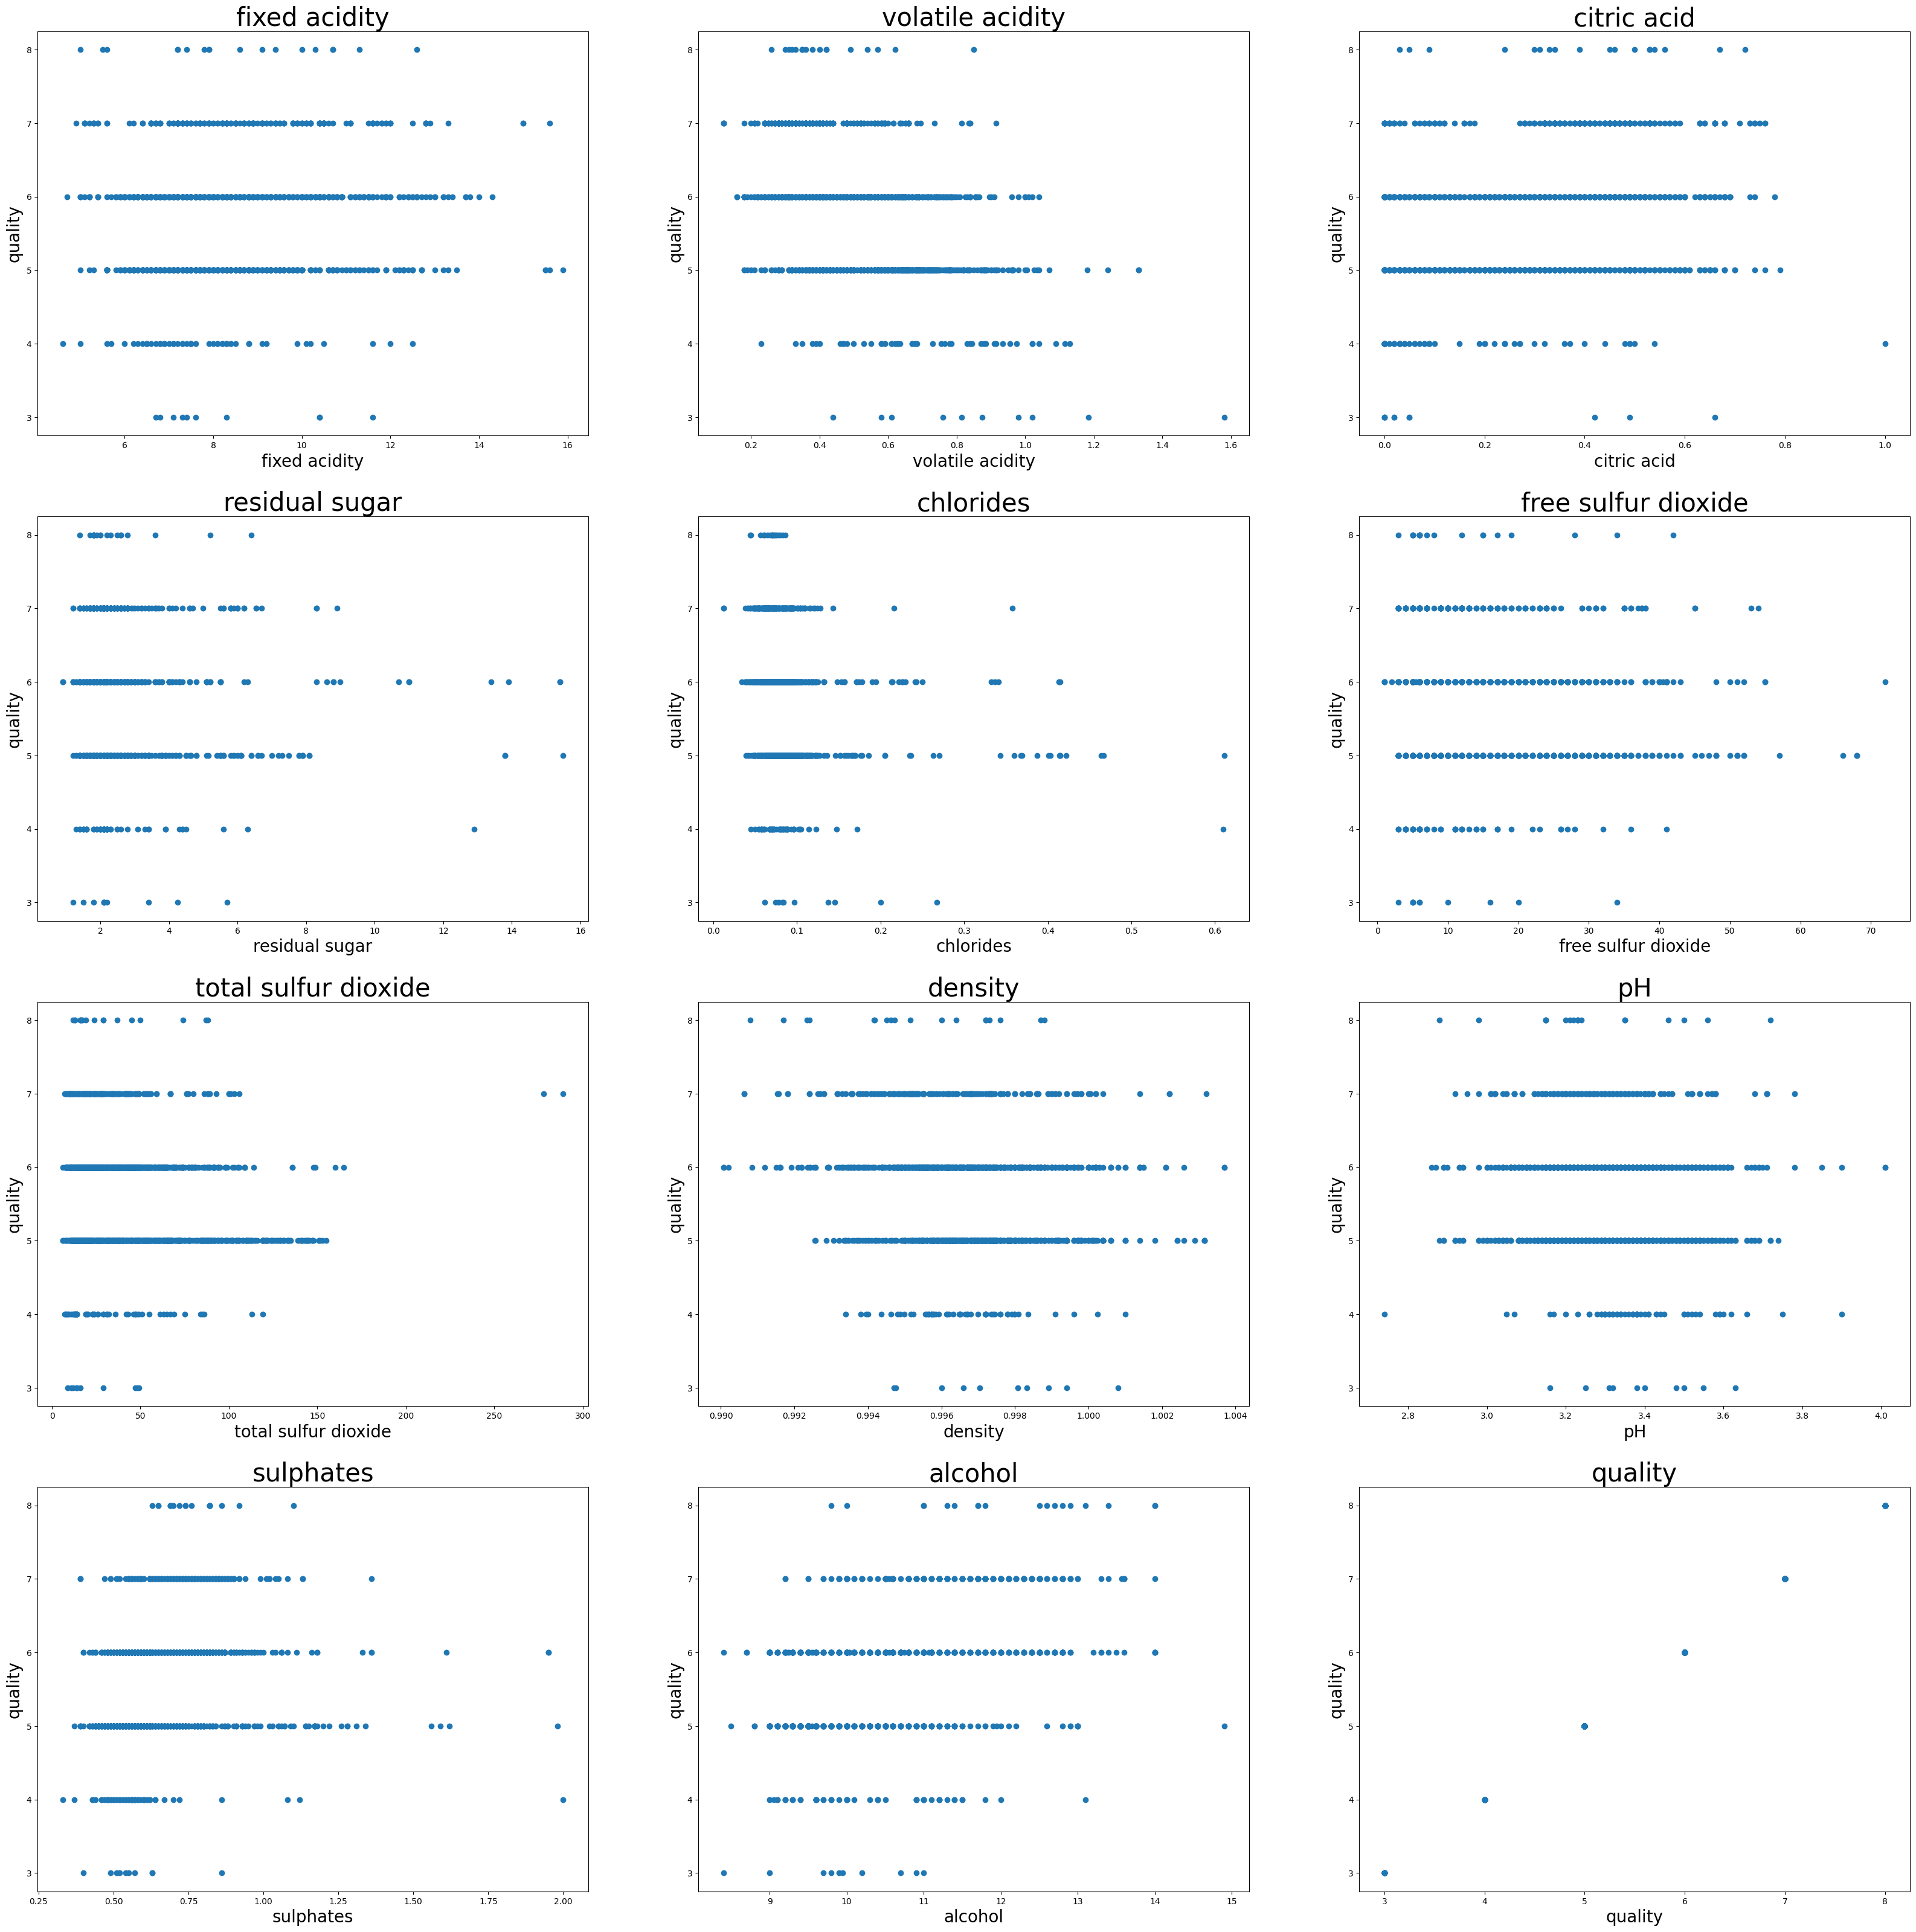

In [12]:
# visualize the correlation between each attribute and wine quality using scatter plot
plt.figure(figsize=(40, 40))
for i, col in enumerate(winequality_red_df.columns):
    plt.subplot(4, 3, i+1)
    x = winequality_red_df[col]
    y = winequality_red_df['quality']
    plt.scatter(x, y, marker='o')
    plt.title(col, fontsize=30)
    plt.xlabel(col, fontsize=20)
    plt.ylabel('quality',  fontsize=20)

# visualize the correlation between each attribute and wine quality using bar
# plt.figure(figsize=(10, 8))
# winequality_red_df.corr()['quality'].plot(kind='bar') #visualize the correlation between each attribute and wine quality using bar graph



### Q6 - Visualize the distribution of data for each attribute using a box plot for each class. Use different colors to denote each class and your figures must contain titles, axis labels, and appropriate legends

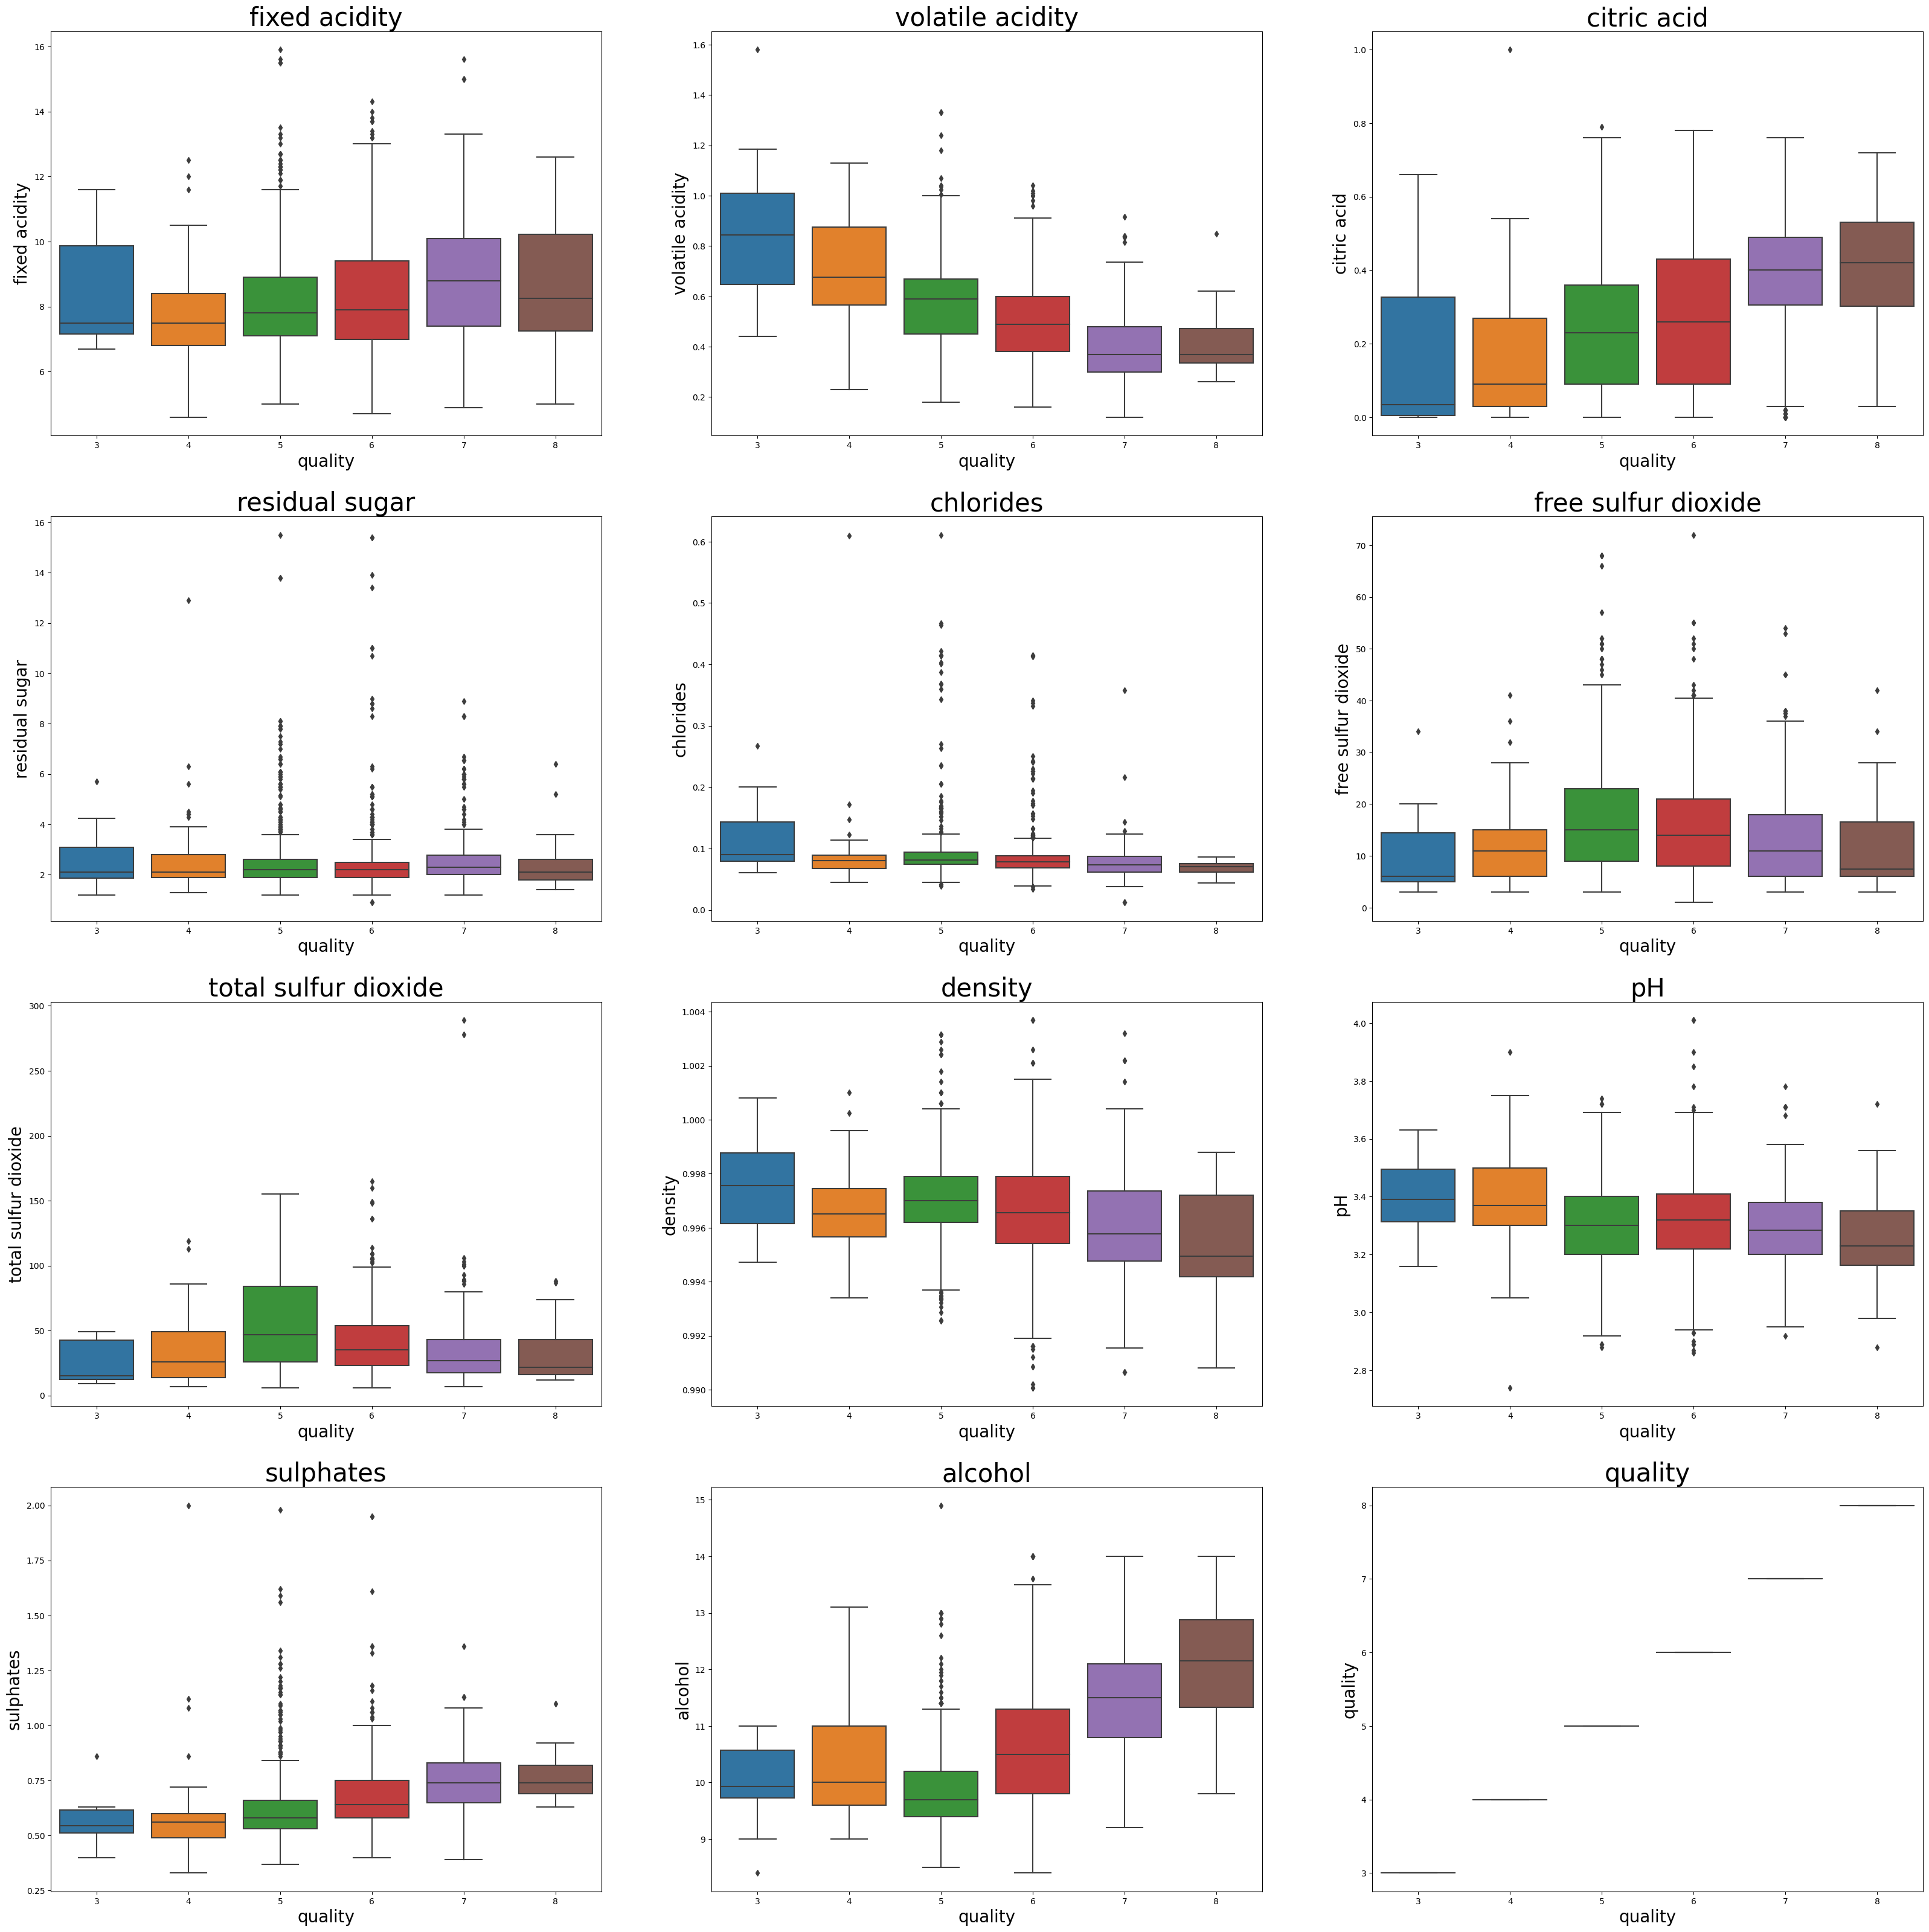

In [13]:
# Visualize the distribution of data for each attribute using a box plot for each class. 
# Use different colors to denote each class and your figures must contain titles, axis labels, and appropriate legends.

# # visualize the distribution of data for each attribute using a box plot for each class
plt.figure(figsize=(40, 40))
for i, col in enumerate(winequality_red_df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='quality', y=col, data=winequality_red_df)
    plt.title(col, fontsize=30)
    plt.xlabel('quality', fontsize=20)
    plt.ylabel(col,  fontsize=20)






### Q7 - Does this dataset contain any outliers? Justify your answer

In [14]:
# identify the number of outliers in each column
Q1 = winequality_red_df.quantile(0.25) #first quartile
Q3 = winequality_red_df.quantile(0.75) #third quartile
IQR = Q3 - Q1   #interquartile range
print(((winequality_red_df < (Q1 - 1.5 * IQR)) | (winequality_red_df > (Q3 + 1.5 * IQR))).sum())

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64


As can be seen in above result, there are outliers present in all the columns.
Outliers are identified as the values which are either:
- greater than 3rd quartile + 1.5 * interquartile range or
- less than 1st quartile - 1.5 * interquartile range

### Q8

#### (a) - Why data normalization/standardization is important in ML?

Normalization/Standardization is a data preprocessing technique that involves transforming the values of features or variables in a dataset to a similar scale. This is done to ensure that all features contribute equally to the model and to prevent features with larger values from dominating the model

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling

Standardization is another scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation

#### (b) - Perform normalization and standardization on the dataset and briefly discuss the difference between them using the results obtained.

In [15]:
# Normalization can be done using following equation:
# x_norm = (x - x_min) / (x_max - x_min)
# print(winequality_red_df.head())
winequality_red_df_norm = (winequality_red_df - winequality_red_df.min()) / (winequality_red_df.max() - winequality_red_df.min())
print(winequality_red_df_norm.head())
print(winequality_red_df_norm.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

As seen above the values of each features shifts inside 0 and 1. 

In [16]:
# Standardization can be done using following equation:
# x_std = (x - x_mean) / x_std
# print(winequality_red_df.head())
winequality_red_df_std = (winequality_red_df - winequality_red_df.mean()) / winequality_red_df.std()
print(winequality_red_df_std.head())
print(winequality_red_df_std.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528194          0.957049    -1.391037       -0.451673  -0.243630   
1      -0.298454          1.957897    -1.391037        0.042943   0.223805   
2      -0.298454          1.290665    -1.185699       -0.169035   0.096323   
3       1.654339         -1.378261     1.483689       -0.451673  -0.264878   
4      -0.528194          0.957049    -1.391037       -0.451673  -0.243630   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466047             -0.379014  0.558100  1.285493  -0.579025   
1             0.872365              0.624168  0.028252 -0.724358   0.128910   
2            -0.083643              0.228975  0.134222 -0.335355  -0.048074   
3             0.107558              0.411372  0.664069 -0.983694  -0.461036   
4            -0.466047             -0.379014  0.558100  1.285493  -0.579025   

    alcohol   quality  
0 -0.959946 -0.787576  
1 -0.584

As seen above the new mean becomes zero and std becomes one

As for the difference between standardization and normalization:
    even though both does archive the same goal, which is feature scaling, it does so, in two different ways. 
    Normalization scales all feature values in between 0 and 1 and standardization only shifts the distribution and scales such that the mean becomes zero and std becomes 1 for all features. 

### Q9 - EDA becomes straightforward and better with pandas-profiling. Generate a data profiling report on our dataset using the pandas-profiling module.

In [17]:
from ydata_profiling import ProfileReport

In [18]:
profile = ProfileReport(winequality_red_df, title='Wine Quality Red Dataset')
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
profile.to_file("winequality_red.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]